# Exploratory Data Analysis (EDA)

This Jupyter notebook is used for Exploratory Data Analysis (EDA), which is a crucial step in understanding the data you are working with. In the context of your project, it would typically include:

- Data Inspection: Loading the data (like historical prices and demand data) and inspecting the first few rows to understand its structure and contents.
- Summary Statistics: Generating summary statistics to get a sense of data distribution, average values, standard deviations, etc.
- Data Cleaning: Identifying and handling missing or incorrect data, outliers, and anomalies.
- Visualization: Creating visualizations such as histograms, scatter plots, and time series plots to understand trends, patterns, and relationships in the data.
- Initial Observations: Making initial observations that can guide further analysis, feature engineering, or model development.

## Travel.csv

In [71]:
import pandas as pd
from deap import base, creator, tools, algorithms
import json
import datetime
import random
import matplotlib.pyplot as plt
import seaborn as sns

RANDOM_SEED = 42
random.seed(RANDOM_SEED)

data = pd.read_csv('../data/Travel.csv')

# Load and preprocess data
data['startDate'] = pd.to_datetime(data['startDate'], unit='s')
data['endDate'] = pd.to_datetime(data['endDate'], unit='s')
data['month'] = data['startDate'].dt.month-1
data['day_of_week'] = data['startDate'].dt.dayofweek
data['hour_of_day'] = data['startDate'].dt.hour


data.head()

,id,carLicensePlate,users,offerId,startPlace.latitude,startPlace.longitude,endPlace.latitude,endPlace.longitude,startDate,endDate,...,score,finishedBy,checkedBy,seats,rentForTime,totalPrice,observations,month,day_of_week,hour_of_day
0,c3a22ae7-eb92-4055-b749-0a01b39432c5,3D7JB1EPXBG126865,"[{""userId"":""Alberta"",""passengers"":2},{""userId""...",bbf22efb-66a6-4569-8a4f-6602b75abed5,-22.845810,-47.228885,49.838180,20.978904,2019-10-20 18:13:55,2019-10-21 07:13:55,...,[],[],[],2,True,50.58,Organic cohesive migration,9,6,18
1,1d71cf23-439f-477b-9dac-7e10d397d6f2,SAJWA0ES5EP943471,"[{""userId"":""Randolph"",""passengers"":1},{""userId...",a29ac556-7fe7-4b70-b9e7-0236674c0168,57.146670,33.107530,38.600000,-121.450000,2019-07-19 09:49:00,2019-07-19 23:49:00,...,[],[],[],1,True,181.45,Synchronised multimedia internet solution,6,4,9
2,4c8a7969-78d0-4fca-ba81-4dd6aa832e3e,JH4CW2H5XCC717031,"[{""userId"":""Isaak"",""passengers"":2},{""userId"":""...",913395a2-c388-41e0-9cda-0ac12d2bb6b3,2.504560,73.308231,14.895168,-24.494564,2018-12-27 01:31:26,2018-12-27 22:31:26,...,[],[],"[{""coordinate"":{""latitude"":-6.2957395,""longitu...",0,True,186.08,Face to face bifurcated capability,11,3,1
3,ba43d360-6ffa-4dbe-b5ad-ed6e69a9fe2a,1N4AA5AP8AC567587,"[{""userId"":""Annabelle"",""passengers"":1}]",4bd92710-8bde-4cc8-b8c5-907411d4117b,38.399170,125.615560,-8.109499,115.161894,2019-07-20 05:42:31,2019-07-21 03:42:31,...,[],[],[],2,True,96.02,Secured analyzing migration,6,5,5
4,10dfed3c-1c61-4a07-bbed-5819ebae59ef,WAUSF98E97A783106,"[{""userId"":""Kissie"",""passengers"":1}]",3543231d-761f-4191-bf58-3219b28d7c15,53.985881,16.981176,14.570330,121.147400,2019-11-05 02:22:54,2019-11-05 05:22:54,...,[],[],[],2,True,22.69,Organic explicit protocol,10,1,2


In [72]:
print(data.info())
print(data.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 320 entries, 0 to 319
Data columns (total 27 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   id                    320 non-null    object        
 1   carLicensePlate       320 non-null    object        
 2   users                 320 non-null    object        
 3   offerId               320 non-null    object        
 4   startPlace.latitude   320 non-null    float64       
 5   startPlace.longitude  320 non-null    float64       
 6   endPlace.latitude     320 non-null    float64       
 7   endPlace.longitude    320 non-null    float64       
 8   startDate             320 non-null    datetime64[ns]
 9   endDate               320 non-null    datetime64[ns]
 10  suggestedEndPlaces    320 non-null    object        
 11  kmTraveled            320 non-null    float64       
 12  status                320 non-null    int64         
 13  priceBalance        

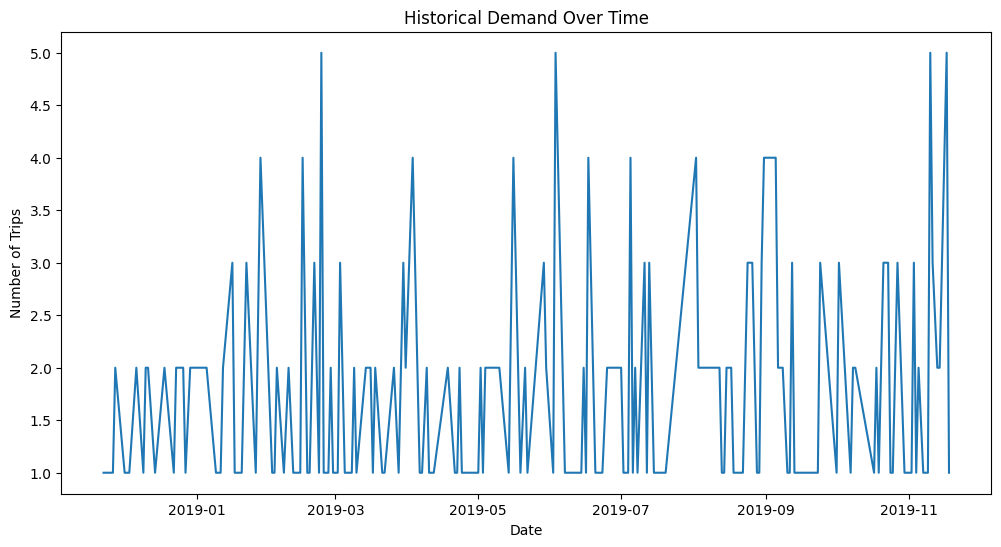

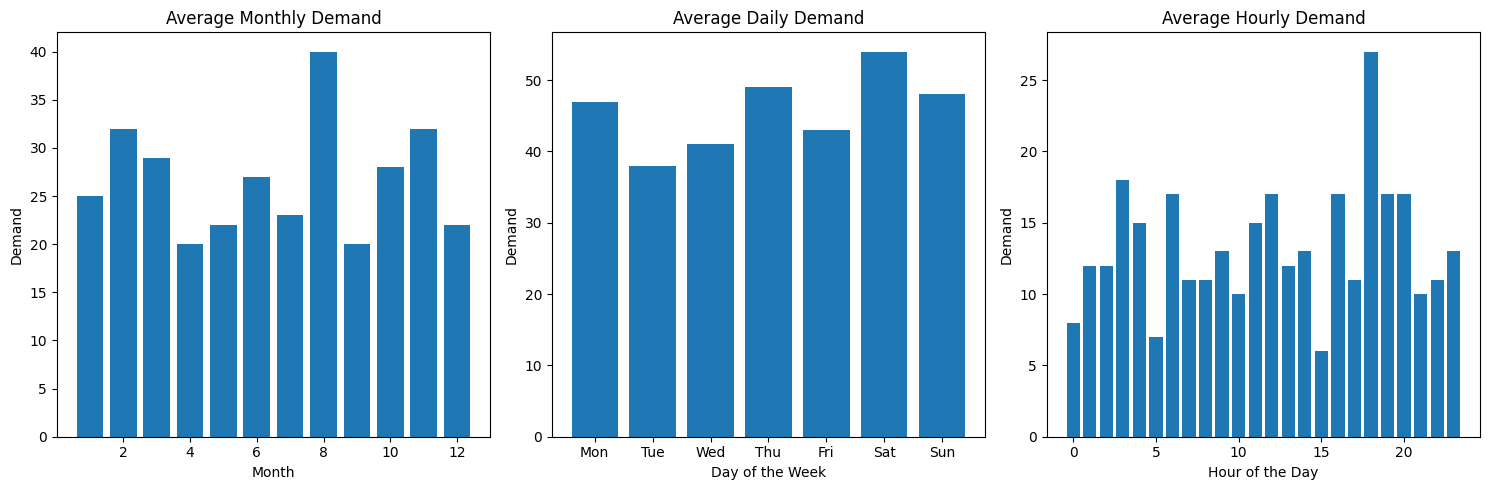

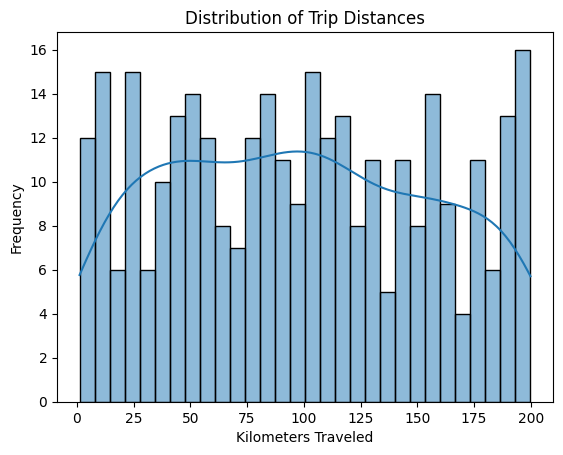

In [76]:
historical_demand = data.groupby(data['startDate'].dt.date).size()
avg_monthly_demand = data.groupby('month').size()
avg_daily_demand = data.groupby('day_of_week').size()
avg_hourly_demand = data.groupby('hour_of_day').size()

# Historical Demand Plot
plt.figure(figsize=(12, 6))
historical_demand.plot(kind='line')
plt.title('Historical Demand Over Time')
plt.xlabel('Date')
plt.ylabel('Number of Trips')
plt.show()

# Plotting
plt.figure(figsize=(15, 5))

# Monthly Demand Plot
plt.subplot(1, 3, 1)
plt.bar(range(1, 13), avg_monthly_demand)
plt.title('Average Monthly Demand')
plt.xlabel('Month')
plt.ylabel('Demand')

# Daily Demand Plot
plt.subplot(1, 3, 2)
plt.bar(range(7), avg_daily_demand)
plt.title('Average Daily Demand')
plt.xlabel('Day of the Week')
plt.ylabel('Demand')
plt.xticks(range(7), ['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun'])

# Hourly Demand Plot
plt.subplot(1, 3, 3)
plt.bar(range(24), avg_hourly_demand)
plt.title('Average Hourly Demand')
plt.xlabel('Hour of the Day')
plt.ylabel('Demand')

plt.tight_layout()
plt.show()

sns.histplot(data['kmTraveled'], bins=30, kde=True)
plt.title('Distribution of Trip Distances')
plt.xlabel('Kilometers Traveled')
plt.ylabel('Frequency')
plt.show()